In [1]:
import numpy as np
from sklearn.metrics import r2_score

def model(X, theta):
    return X.dot(theta)

def function_count(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
 
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
 
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    cost_history = np.zeros(n_iterations) 
     
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = function_count(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
         
    return theta, cost_history

def correlation_coeff(actual,predict):
    corr_matrix = np.corrcoef(actual, predict)
    corr = corr_matrix[0,1]
    return corr**2

# 1ere regression 
v.python

MEAN_squared :
20.429398909222137
0.972438175617983


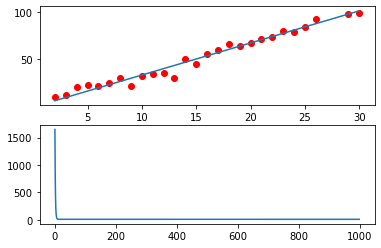

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


reg_lineaire=pd.read_csv("C:/Users/julie/Desktop/Microsoft/Data/1ere regression lineaire/reg_lineaire.csv",sep=",")



x=reg_lineaire['heure_rev'].to_numpy()
x=x.reshape((len(x),1))
X = np.hstack((x, np.ones(x.shape)))
y=reg_lineaire['note'].to_numpy()
y=y.reshape((len(y),1))
theta = np.random.randn(2, 1)



theta_final,cost=gradient_descent(X,y,theta,0.001,1000)
print("MEAN_squared :")
print(mean_squared_error(y,model(X,theta_final)))
plt.subplot(211)
plt.plot(reg_lineaire['heure_rev'],reg_lineaire['note'],'ro')
plt.plot(x, model(X,theta_final))
print(r2_score(y,model(X,theta_final)))
plt.subplot(212)
plt2=plt.plot(range(1000),cost)



# Regression multiple
v.python

theta_final :
MEAN_squared :
28.0829327354275


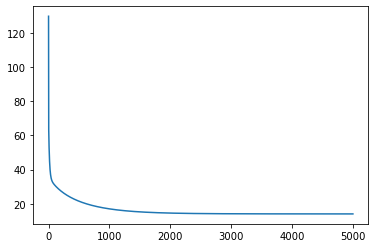

0.6673409099252119


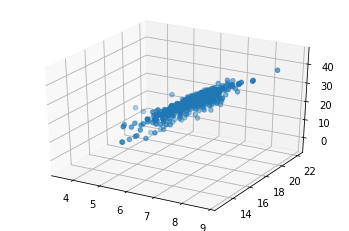

In [3]:
reg_lineaire_multiple1=pd.read_csv("C:/Users/julie/Desktop/Microsoft/Data/1ere regression lineaire/boston_house_prices.csv",sep=",")


x_df=reg_lineaire_multiple1[['RM','DIS','PTRATIO','LSTAT']]
x=x_df.to_numpy()
X = np.c_[x,np.ones(x.shape[0])]

y=reg_lineaire_multiple1['MEDV'].to_numpy()
y=y.reshape((len(y),1))

theta = np.random.randn(len(x_df.columns)+1, 1)



theta_final,cost=gradient_descent(X,y,theta,0.001,5000)
print("theta_final :")
print("MEAN_squared :")
print(mean_squared_error(y,model(X,theta_final)))
plt2=plt.plot(range(5000),cost)
plt.show()

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(X[:,0],X[:,2],model(X,theta_final))
print(r2_score(y,model(X,theta_final)))


# Regression polynomiale
v.python

MEAN_squared :
3224726860.0975013


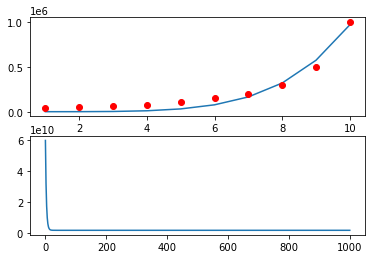

0.9600218583030166


In [4]:
reg_lineaire_poly=pd.read_csv("C:/Users/julie/Desktop/Microsoft/Data/1ere regression lineaire/Position_salaries.csv",sep=",")
plt.plot(reg_lineaire_poly['Level'],reg_lineaire_poly['Salary'],'ro')


x_df=reg_lineaire_poly[['Level']]
x=x_df.to_numpy()
X = np.c_[x,np.ones(x.shape[0])]
X = np.c_[x**2,X]
X = np.c_[x**3,X]
X = np.c_[x**4,X]
X = np.c_[x**5,X]


y=reg_lineaire_poly['Salary'].to_numpy()
Y=y.reshape((-1,1))

theta = np.random.randn(6, 1)


theta_final,cost=gradient_descent(X,Y,theta,0.0000000001,1000)

print("MEAN_squared :")
print(mean_squared_error(y,model(X,theta_final)))
plt.subplot(211)
plt.plot(x, model(X,theta_final))
plt.plot(x,y,"ro")

plt.subplot(212)
plt2=plt.plot(range(1000),cost)
plt.show()
print(r2_score(y,model(X,theta_final)))

# Regression  qualité_vin_rouge


In [5]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import r2_score
reg_lineaire_multiple=pd.read_csv("C:/Users/julie/Desktop/Microsoft/Data/1ere regression lineaire/qualite-vin-rouge.csv",sep=",")


X=reg_lineaire_multiple.iloc[:,:-1].values
Y=reg_lineaire_multiple.iloc[:,-1].values
reg_lineaire_multiple

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


MEAN_squared :
53.280679287097264
-82.09361366337707


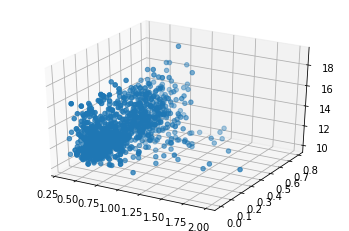

In [6]:
from sklearn.preprocessing import StandardScaler


reg_lineaire_multiple=pd.read_csv("C:/Users/julie/Desktop/Microsoft/Data/1ere regression lineaire/qualite-vin-rouge.csv",sep=",")



train_set = reg_lineaire_multiple.sample(frac=0.75, random_state=0)
test_set = reg_lineaire_multiple.drop(train_set.index)

x=train_set.iloc[:,[9,10,2]].to_numpy()


X = np.c_[x,np.ones(x.shape[0])]

X = np.hstack((x, np.ones(x.shape)))
y=train_set['qualité'].to_numpy()
y=y.reshape((len(y),1))


x_test=test_set.iloc[:,:-1].to_numpy()

X_test= np.c_[x_test,np.ones(x_test.shape[0])]

X = np.hstack((x, np.ones(x.shape)))
y_test=test_set['qualité'].to_numpy()
y_test=y_test.reshape((len(y_test),1))

theta = np.random.randn(6, 1)



theta_final,cost=gradient_descent(X,y,theta,0.00,5000)
print("MEAN_squared :")
print(mean_squared_error(y,model(X,theta_final)))


fig = plt.figure()
ax = plt.axes(projection="3d")
print(r2_score(y,model(X,theta_final)))

ax.scatter(X[:,0],X[:,2],model(X,theta_final))



# Version avec Scikit-learn

# Regression lineaire


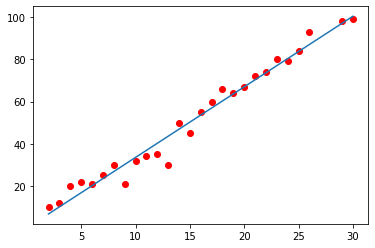

0.9732132549497465
20.461930334507777


In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder


reg_lineaire
X=reg_lineaire.iloc[:,0:1].values
Y=reg_lineaire.iloc[:,-1].values


x_test, x_app, y_test, y_app = train_test_split(X,Y,test_size=0.8,random_state=3)

model = linear_model.LinearRegression()
model.fit(x_app,y_app)
plt.plot(reg_lineaire['heure_rev'],reg_lineaire['note'],'ro')
plt.plot(X, model.predict(X))
plt.show()
print(r2_score(Y,model.predict(X)))

print(mean_squared_error(y_test,model.predict(x_test)))


Nos modèles construits sont très proches, l'erreur quadratique moyenne trouvée est la même pour nos 2 versions.

## Regression multiple

0.6892120408933597
26.745087563008017


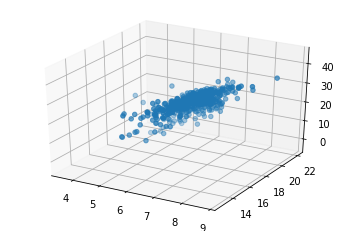

In [13]:

X=reg_lineaire_multiple1.iloc[:,[5,7,10,12]].values
Y=reg_lineaire_multiple1.iloc[:,-1].values

x_test, x_app, y_test, y_app = train_test_split(X,Y,test_size=0.8,random_state=3)

model = linear_model.LinearRegression()
model.fit(x_app,y_app)
print(r2_score(Y,model.predict(X)))

print(mean_squared_error(y_test,model.predict(x_test)))

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(X[:,0],X[:,2],model.predict(X))


Nos modèles construits sont très proches, l'erreur quadratique moyenne trouvée est la même pour nos 2 versions.

# Regression polynomiale

In [17]:


reg_lineaire_poly
X=reg_lineaire_poly.iloc[:,1].values.reshape(-1,1)
Y=reg_lineaire_poly.iloc[:,-1].values



0.9997969027099755


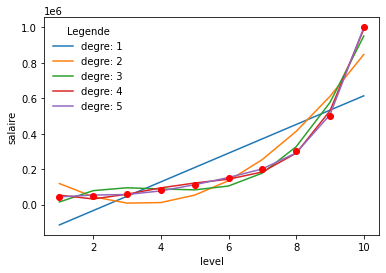

In [19]:

from sklearn.preprocessing import PolynomialFeatures

for i in range(1,6):
    poly = PolynomialFeatures(i)
    Xpoly=poly.fit_transform(X)

    model2 = linear_model.LinearRegression()
    model2.fit(Xpoly,Y)
    plt.plot(X,model2.predict(Xpoly),label='degre: '+str(i))
    
    
plt.plot(X,Y,"ro")
plt.xlabel("level")
plt.ylabel("salaire")
plt.legend( title="Legende", frameon=False)
print(r2_score(Y,model2.predict(Xpoly)))
